- coverage maps commented out [ not necessary ]
- scaling removed for bar plots [ not neccesary ]
- tables
- bargraphs
- maps
- distribution boxplots

In [1]:
from os import walk
import re
from os.path import join, split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from os import makedirs

import geopandas as gpd
import geoplot as gplt

import matplotlib as mpl
mpl.rcParams["font.size"] = 14

In [2]:
sadc = ['Angola', 'Botswana', 'Comoros', 'Democratic_Republic_of_Congo',
        'Eswatini', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique',
        'Namibia', 'South_Africa', 'Tanzania', 'Zambia', 'Zimbabwe', 'Seychelles']
alphas = [0.01, 0.05, 0.1]
files = []

for alpha in alphas:
    for country in sadc:
        data_path = country + '/' + str(alpha) + '/results/'

        for (dirpath, _, filenames) in walk(data_path):
            files += [join(dirpath, file) for file in filenames]
            break

# files

In [3]:
# x0 = pd.read_pickle('South_Africa/0.01/results/multiple_runs_cases.pkl')
# x1 = pd.read_pickle('South_Africa/0.05/results/multiple_runs_cases.pkl')
# x2 = pd.read_pickle('South_Africa/0.1/results/multiple_runs_cases.pkl')


In [4]:
decimals = 4

# all trials for all countries
regexs = ['.*cases*', '.*deaths*']
for regex in regexs:
    r = re.compile(regex)
#     vars()["{}_results_{}".format(regex.split('*')[2], regex.split('*')[1].split('.')[1])] = {}
    files_filter = list(filter(r.match, files))
#     print(r)
#     print(files_filter)
    for alpha in alphas:
        r = re.compile('.*/' + str(alpha) + '/*')
        files_filter_ = list(filter(r.match, files_filter))
#         print(r)
#         print(files_filter_)
        vars()["{}_results_{}".format(regex.split('*')[1], str(alpha).split('.')[1])] = {}
        for file in files_filter_:
            vars()["{}_results_{}".format(regex.split('*')[1], str(alpha).split('.')[1])][file.split('/')[0]] = pd.read_pickle(file).round(decimals = decimals)
        

In [5]:
%whos dict

Variable            Type    Data/Info
-------------------------------------
cases_results_01    dict    n=16
cases_results_05    dict    n=16
cases_results_1     dict    n=16
deaths_results_01   dict    n=16
deaths_results_05   dict    n=16
deaths_results_1    dict    n=16


In [6]:
tab_path = 'tables/'
makedirs(tab_path, exist_ok = True)

# forecast performance summary stats RSA
cases_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_forecast.xlsx')
deaths_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_forecast.xlsx')

In [7]:
cases_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe()

,smape_meslstm,rmse_meslstm,smape_lstm,rmse_lstm,smape_varmax,rmse_varmax,smape_sarimax,rmse_sarimax,smape_mlr,rmse_mlr
count,35.000000,35.000000,35.000000,35.000000,35.0,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,0.790754,23356.250991,9.220560,252195.622057,200.0,2.431302e+07,3.859700e+00,1.098662e+05,5.522100e+00,1.548038e+05
std,0.135463,3751.928364,7.728824,190462.214978,0.0,1.133903e-08,2.703436e-15,2.952873e-11,2.703436e-15,5.905745e-11
min,0.563700,17130.716100,0.798400,25546.728900,200.0,2.431302e+07,3.859700e+00,1.098662e+05,5.522100e+00,1.548038e+05
25%,0.698300,20723.184250,3.786650,120309.813900,200.0,2.431302e+07,3.859700e+00,1.098662e+05,5.522100e+00,1.548038e+05
50%,0.775600,22804.474800,7.850700,223916.183300,200.0,2.431302e+07,3.859700e+00,1.098662e+05,5.522100e+00,1.548038e+05
75%,0.890800,26175.718700,11.966850,339990.598600,200.0,2.431302e+07,3.859700e+00,1.098662e+05,5.522100e+00,1.548038e+05
max,1.142600,33191.054500,33.040800,810020.745100,200.0,2.431302e+07,3.859700e+00,1.098662e+05,5.522100e+00,1.548038e+05


In [8]:
deaths_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe()

,smape_meslstm,rmse_meslstm,smape_lstm,rmse_lstm,smape_varmax,rmse_varmax,smape_sarimax,rmse_sarimax,smape_mlr,rmse_mlr
count,35.000000,35.000000,35.000000,35.000000,35.0,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.0000
mean,0.512860,474.795106,7.949797,7135.725809,200.0,7.649459e+05,8.453000e-01,8.519688e+02,3.627100e+00,3578.8793
std,0.171665,141.960928,5.463055,4670.651428,0.0,3.543447e-10,7.885021e-16,4.613863e-13,9.011452e-16,0.0000
min,0.261700,249.971000,1.305700,1288.615600,200.0,7.649459e+05,8.453000e-01,8.519688e+02,3.627100e+00,3578.8793
25%,0.397200,385.373600,3.106000,3102.190050,200.0,7.649459e+05,8.453000e-01,8.519688e+02,3.627100e+00,3578.8793
50%,0.476400,451.760700,6.763700,5795.152300,200.0,7.649459e+05,8.453000e-01,8.519688e+02,3.627100e+00,3578.8793
75%,0.597600,544.792200,11.291400,10256.837600,200.0,7.649459e+05,8.453000e-01,8.519688e+02,3.627100e+00,3578.8793
max,1.011800,884.275000,24.795100,21691.457500,200.0,7.649459e+05,8.453000e-01,8.519688e+02,3.627100e+00,3578.8793


In [9]:
cases_results_1['South_Africa'].filter(regex = r'(rmse|smape)').head()

,smape_meslstm,rmse_meslstm,smape_lstm,rmse_lstm,smape_varmax,rmse_varmax,smape_sarimax,rmse_sarimax,smape_mlr,rmse_mlr
1,0.6495,19516.9005,33.0408,810020.7451,200.0,2.431302e+07,3.8597,109866.1714,5.5221,154803.7861
2,0.7216,21335.9847,6.7863,217540.8081,200.0,2.431302e+07,3.8597,109866.1714,5.5221,154803.7861
3,0.7299,21686.2736,16.0455,423730.9473,200.0,2.431302e+07,3.8597,109866.1714,5.5221,154803.7861
4,0.7243,21688.7737,8.1491,223916.1833,200.0,2.431302e+07,3.8597,109866.1714,5.5221,154803.7861
5,0.5701,17130.7161,1.2049,37018.6392,200.0,2.431302e+07,3.8597,109866.1714,5.5221,154803.7861


In [10]:
deaths_results_1['South_Africa'].filter(regex = r'(rmse|smape)').head()

,smape_meslstm,rmse_meslstm,smape_lstm,rmse_lstm,smape_varmax,rmse_varmax,smape_sarimax,rmse_sarimax,smape_mlr,rmse_mlr
1,0.4441,432.0215,7.5768,6214.1867,200.0,764945.8692,0.8453,851.9688,3.6271,3578.8793
2,0.4922,451.7607,9.9583,9127.2586,200.0,764945.8692,0.8453,851.9688,3.6271,3578.8793
3,0.3281,327.9830,6.7637,5573.0321,200.0,764945.8692,0.8453,851.9688,3.6271,3578.8793
4,0.3996,385.1058,2.2453,2441.2062,200.0,764945.8692,0.8453,851.9688,3.6271,3578.8793
5,0.3606,352.7553,13.5308,12412.0877,200.0,764945.8692,0.8453,851.9688,3.6271,3578.8793


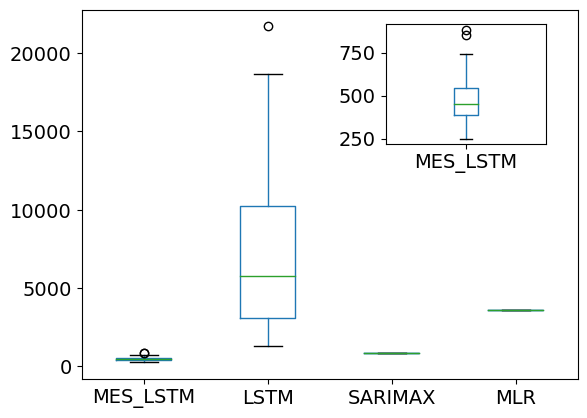

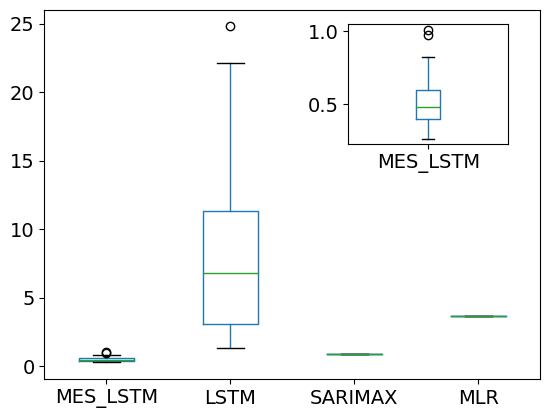

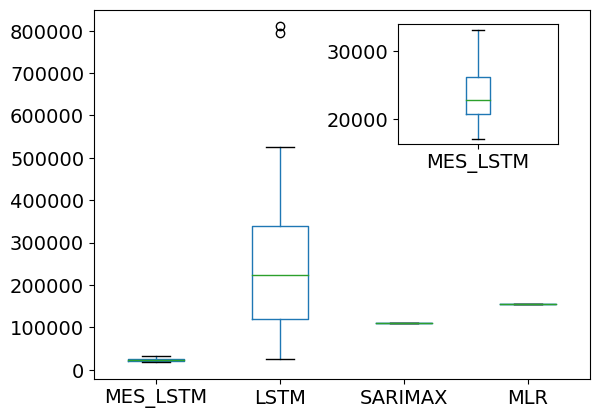

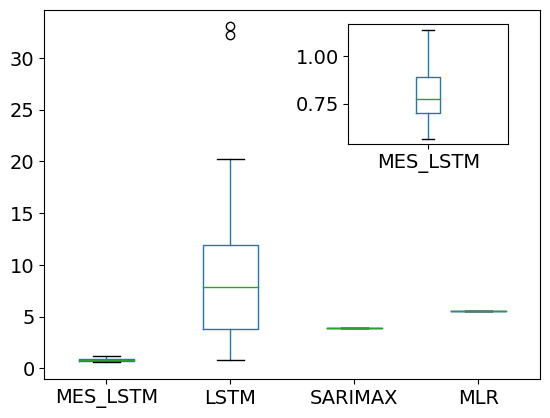

In [11]:
save_path = 'figures/'
makedirs(save_path, exist_ok = True)
drop_col = ['MES_LSTM', 'LSTM', 'SARIMAX', 'MLR']
rename_col = ['MES_LSTM']

fig = plt.figure()
deaths_results_1['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_varmax'], axis = 1).set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
sub_axes = plt.axes([.6, .6, .25, .25])
sub_axes.plot() #zoom in
deaths_results_1['South_Africa'].filter(regex = r'(rmse_meslstm)').set_axis(rename_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'mergezoom_deaths_rmse_box.pdf', dpi = 600)
plt.show()

fig = plt.figure()
deaths_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_varmax'], axis = 1).set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
sub_axes = plt.axes([.6, .6, .25, .25])
sub_axes.plot() #zoom in
deaths_results_1['South_Africa'].filter(regex = r'(smape_meslstm)').set_axis(rename_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'mergezoom_deaths_smape_box.pdf', dpi = 600)
plt.show()


fig = plt.figure()
cases_results_1['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_varmax'], axis = 1).set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
sub_axes = plt.axes([.6, .6, .25, .25])
sub_axes.plot() #zoom in
cases_results_1['South_Africa'].filter(regex = r'(rmse_meslstm)').set_axis(rename_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'mergezoom_cases_rmse_box.pdf', dpi = 600)
plt.show()


fig = plt.figure()
cases_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_varmax'], axis = 1).set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
sub_axes = plt.axes([.6, .6, .25, .25])
sub_axes.plot() #zoom in
cases_results_1['South_Africa'].filter(regex = r'(smape_meslstm)').set_axis(rename_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'mergezoom_cases_smape_box.pdf', dpi = 600)
plt.show()

In [12]:
# PI performance summary stats RSA
cases_results_1['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_1.xlsx')
cases_results_05['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_05.xlsx')
cases_results_01['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_01.xlsx')
deaths_results_1['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_1.xlsx')
deaths_results_05['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_05.xlsx')
deaths_results_01['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_01.xlsx')

In [13]:
# from scipy.stats import describe
# describe(cases_results_1['South_Africa'].filter(regex = r'(mis|cov)'), axis=0)

In [14]:
cases_results_01['South_Africa'].filter(regex = r'(mis|cov)').describe()

,mis_meslstm,cov_meslstm,mis_lstm,cov_lstm,mis_varmax,cov_varmax,mis_sarimax,cov_sarimax,mis_mlr,cov_mlr
count,3.500000e+01,35.000000,3.500000e+01,35.0,3.500000e+01,35.0,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,3.131559e+05,88.202766,6.774777e+06,100.0,4.597342e+07,100.0,4.046371e+06,1.290320e+01,3.510520e+06,4.193550e+01
std,2.881232e+05,23.845605,7.367915e+05,0.0,3.779677e-08,0.0,2.362298e-09,1.261603e-14,1.889838e-09,2.883665e-14
min,7.765495e+04,19.354800,5.563839e+06,100.0,4.597342e+07,100.0,4.046371e+06,1.290320e+01,3.510520e+06,4.193550e+01
25%,1.100243e+05,96.774200,6.283620e+06,100.0,4.597342e+07,100.0,4.046371e+06,1.290320e+01,3.510520e+06,4.193550e+01
50%,2.403181e+05,100.000000,6.658511e+06,100.0,4.597342e+07,100.0,4.046371e+06,1.290320e+01,3.510520e+06,4.193550e+01
75%,3.718161e+05,100.000000,7.255670e+06,100.0,4.597342e+07,100.0,4.046371e+06,1.290320e+01,3.510520e+06,4.193550e+01
max,1.512301e+06,100.000000,8.841033e+06,100.0,4.597342e+07,100.0,4.046371e+06,1.290320e+01,3.510520e+06,4.193550e+01


In [15]:
# import pandas_profiling as pp
# eda = pp.ProfileReport(cases_results_1['South_Africa'].filter(regex = r'(mis|cov)'))
# display(eda)


In [16]:
# accuracy for all countries (averaged trials)
cases_acc_01 = pd.DataFrame(columns = cases_results_01[list(cases_results_01.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_01 = pd.DataFrame(columns = deaths_results_01[list(deaths_results_01.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize
cases_acc_05 = pd.DataFrame(columns = cases_results_05[list(cases_results_05.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_05 = pd.DataFrame(columns = deaths_results_05[list(deaths_results_05.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize
cases_acc_1 = pd.DataFrame(columns = cases_results_1[list(cases_results_1.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_1 = pd.DataFrame(columns = deaths_results_1[list(deaths_results_1.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize

for key in list(deaths_results_1.keys()): # for each country
    cases_acc_01.loc[key] = cases_results_01[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_01.loc[key] = deaths_results_01[key].mean(axis = 0).round(decimals = decimals)
    cases_acc_05.loc[key] = cases_results_05[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_05.loc[key] = deaths_results_05[key].mean(axis = 0).round(decimals = decimals)
    cases_acc_1.loc[key] = cases_results_1[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_1.loc[key] = deaths_results_1[key].mean(axis = 0).round(decimals = decimals)

In [17]:
# forecasts all countries
cases_acc_1.filter(regex = r'(rmse|smape)').to_excel(tab_path + 'sadc_cases_forecast.xlsx')
deaths_acc_1.filter(regex = r'(rmse|smape)').to_excel(tab_path + 'sadc_deaths_forecast.xlsx')

# PI all counries
cases_acc_01.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_01.xlsx')
cases_acc_05.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_05.xlsx')
cases_acc_1.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_1.xlsx')
deaths_acc_01.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_01.xlsx')
deaths_acc_05.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_05.xlsx')
deaths_acc_1.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_1.xlsx')

In [18]:
%whos DataFrame

Variable        Type         Data/Info
--------------------------------------
cases_acc_01    DataFrame                             <...>   591283.4915      0.0  
cases_acc_05    DataFrame                             <...>                    0.0  
cases_acc_1     DataFrame                             <...>                    0.0  
deaths_acc_01   DataFrame                             <...>     7428.9689      0.0  
deaths_acc_05   DataFrame                             <...>     1973.0806      0.0  
deaths_acc_1    DataFrame                             <...>     1121.2568      0.0  


In [ ]:
# accuracy for all sadc (averaged trials, avergaed countries) only useful for bar plots

cases_sadc_01 = cases_acc_01.mean(axis = 0).round(decimals = decimals)
deaths_sadc_01 = deaths_acc_01.mean(axis = 0).round(decimals = decimals)
cases_sadc_05 = cases_acc_05.mean(axis = 0).round(decimals = decimals)
deaths_sadc_05 = deaths_acc_05.mean(axis = 0).round(decimals = decimals)
cases_sadc_1 = cases_acc_1.mean(axis = 0).round(decimals = decimals)
deaths_sadc_1 = deaths_acc_1.mean(axis = 0).round(decimals = decimals)

### South Africa

In [ ]:
objects = ('MES_LSTM', 'LSTM', 'VARMAX', 'SARIMAX', 'MLR')
y_pos = np.arange(len(objects))
bar_width = 0.35
opacity = 0.85

### SMAPE

In [ ]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
legend_loc = 0
legend_font = 12

total_cases_01 = cases_acc_01.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_01 = deaths_acc_01.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')
plt.xlabel('sMAPE (%)')
plt.ylabel('Model')
# plt.title('sMAPE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'smape_sa.pdf', dpi = 600)
plt.show()


### RMSE

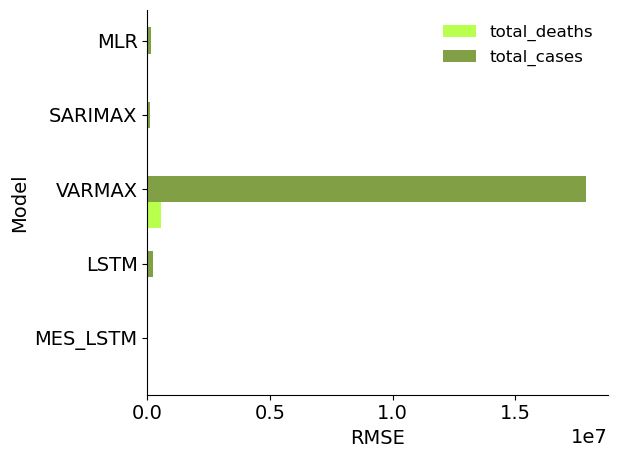

In [22]:
total_cases_01 = cases_acc_01.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_01 = deaths_acc_01.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0).values[0]

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')
plt.xlabel('RMSE')
plt.ylabel('Model')
# plt.title('nMASE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'rmse_sa.pdf', dpi = 600)
plt.show()

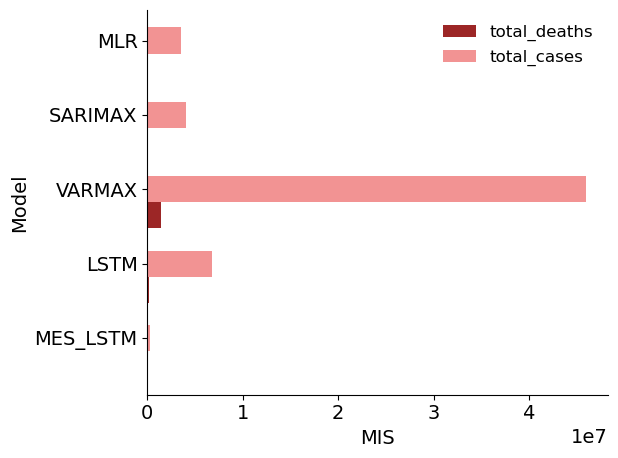

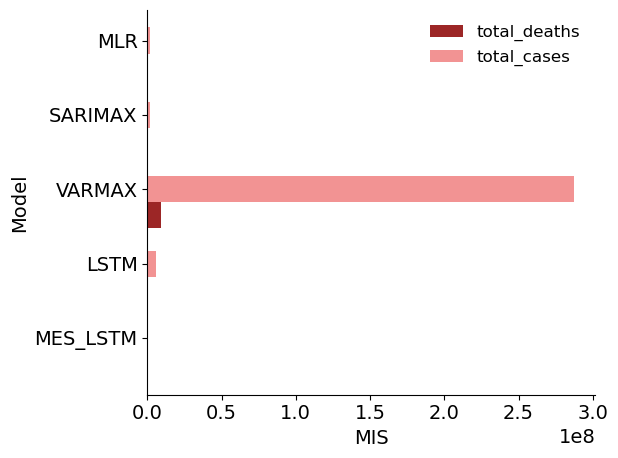

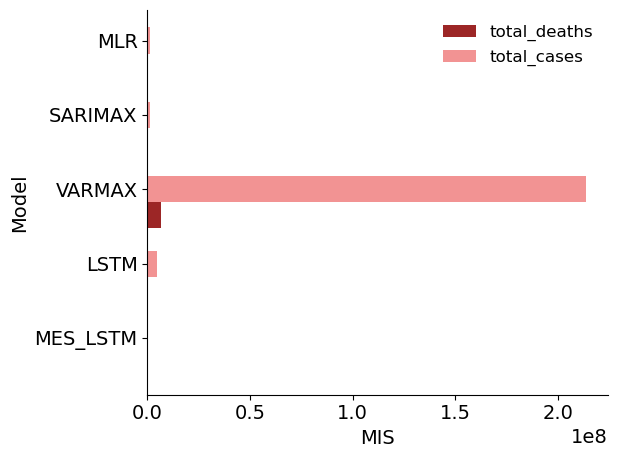

In [23]:
total_cases_01 = cases_acc_01.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_01 = deaths_acc_01.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_05 = cases_acc_05.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_05 = deaths_acc_05.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_1 = cases_acc_1.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_1 = deaths_acc_1.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]

# alpha = 0.01
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_01.pdf', dpi = 600)
plt.show()

# alpha = 0.05
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_1.pdf', dpi = 600)
plt.show()

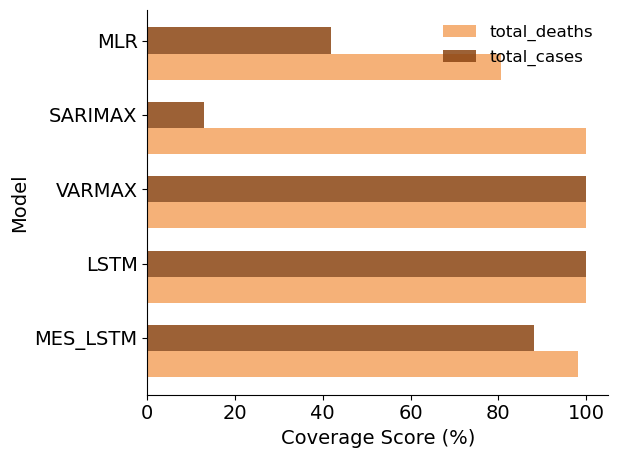

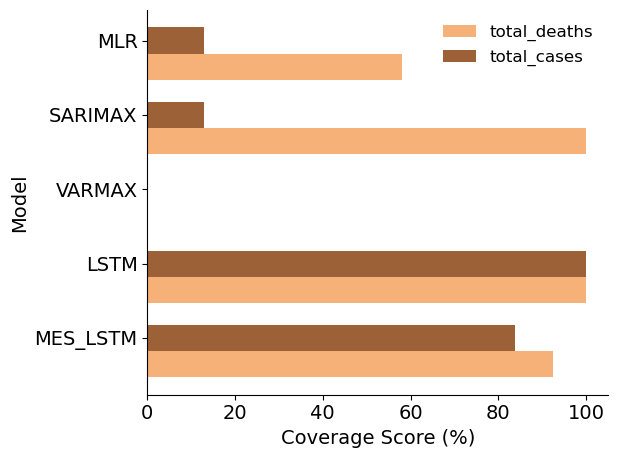

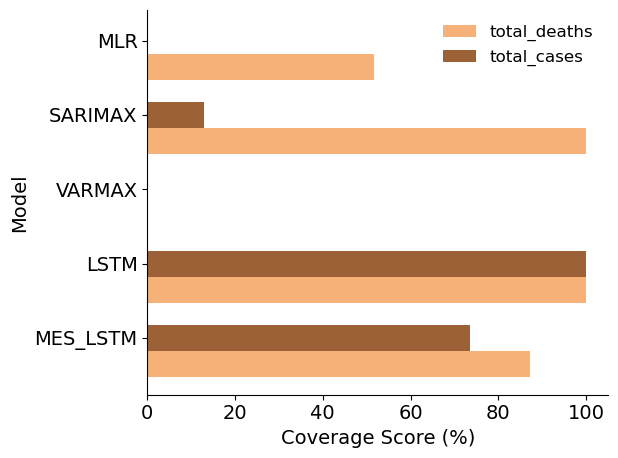

In [24]:
total_cases_01 = cases_acc_01.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_01 = deaths_acc_01.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_05 = cases_acc_05.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_05 = deaths_acc_05.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_1 = cases_acc_1.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_1 = deaths_acc_1.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]

# alpha = 0.01
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_01.pdf', dpi = 600)
plt.show()

# alpha = 0.05
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_1.pdf', dpi = 600)
plt.show()



### SADC

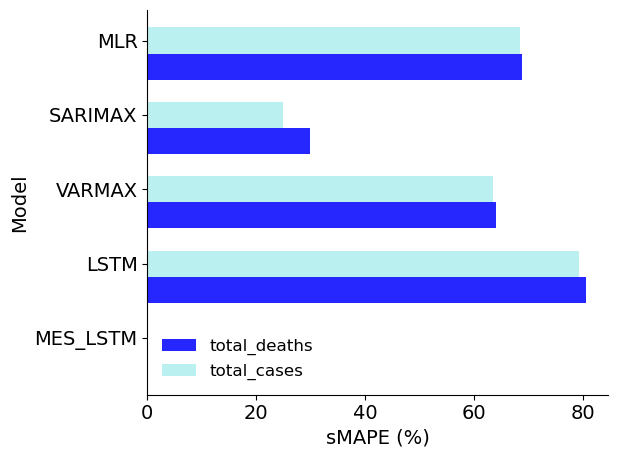

In [25]:
total_cases_01 = cases_sadc_01.filter(like = 'smape').values
total_deaths_01 = deaths_sadc_01.filter(like = 'smape').values

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')
plt.xlabel('sMAPE (%)')
plt.ylabel('Model')
# plt.title('sMAPE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)

plt.tight_layout()
plt.savefig(save_path + 'smape_sadc.pdf', dpi = 600)
plt.show()

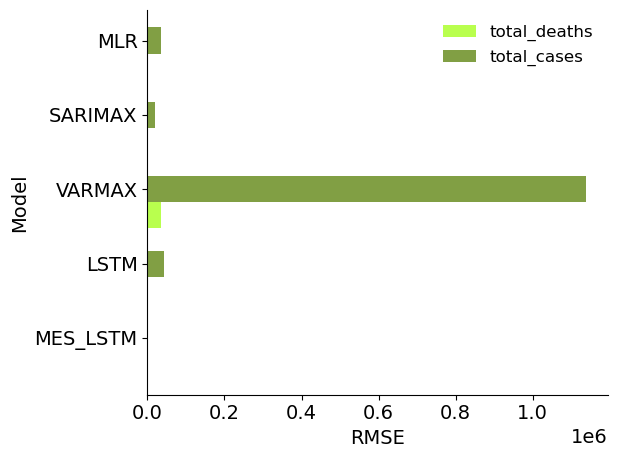

In [26]:
total_cases_01 = cases_sadc_01.filter(like = 'rmse').values
total_deaths_01 = deaths_sadc_01.filter(like = 'rmse').values


fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')
plt.xlabel('RMSE')
plt.ylabel('Model')
# plt.title('nMASE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'rmse_sadc.pdf', dpi = 600)
plt.show()

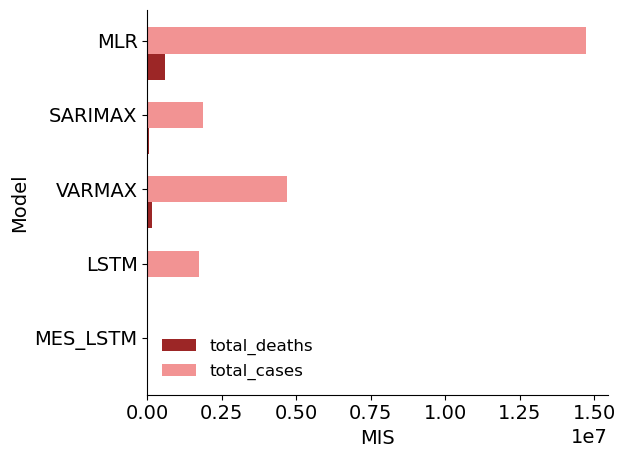

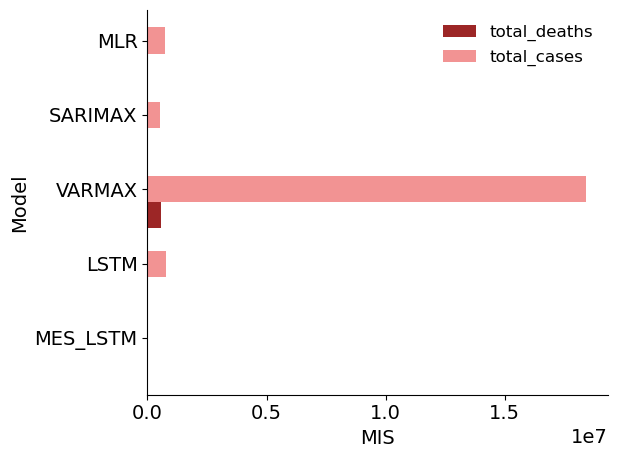

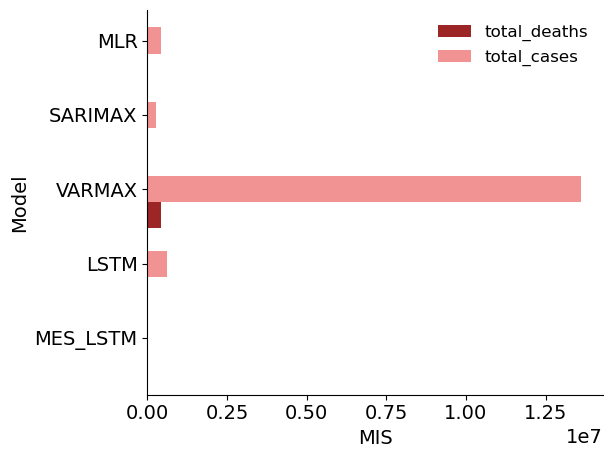

In [27]:
total_cases_01 = cases_sadc_01.filter(like = 'mis').values
total_deaths_01 = deaths_sadc_01.filter(like = 'mis').values
total_cases_05 = cases_sadc_05.filter(like = 'mis').values
total_deaths_05 = deaths_sadc_05.filter(like = 'mis').values
total_cases_1 = cases_sadc_1.filter(like = 'mis').values
total_deaths_1 = deaths_sadc_1.filter(like = 'mis').values

# alpha = 0.01
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_01.pdf', dpi = 600)
plt.show()

# alpha = 0.05
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_1.pdf', dpi = 600)
plt.show()

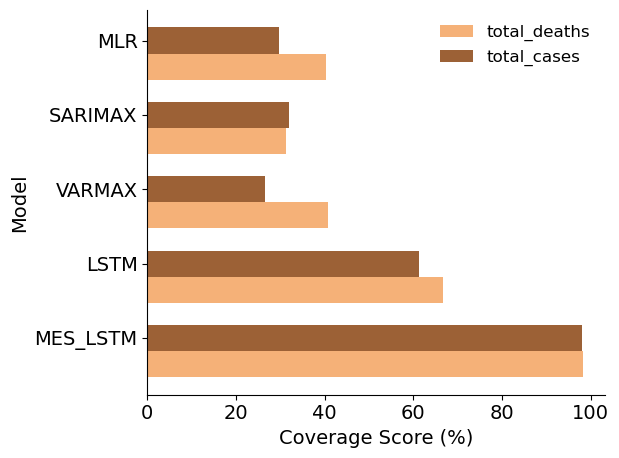

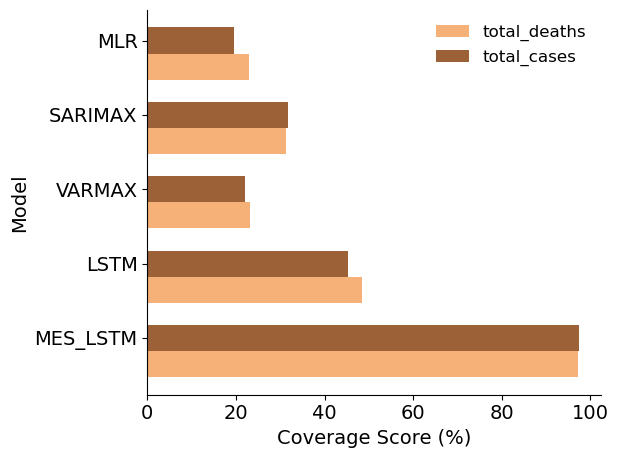

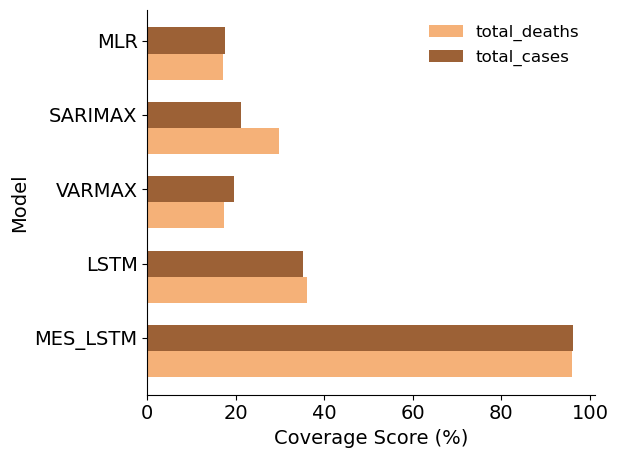

In [28]:
total_cases_01 = cases_sadc_01.filter(like = 'cov').values
total_deaths_01 = deaths_sadc_01.filter(like = 'cov').values
total_cases_05 = cases_sadc_05.filter(like = 'cov').values
total_deaths_05 = deaths_sadc_05.filter(like = 'cov').values
total_cases_1 = cases_sadc_1.filter(like = 'cov').values
total_deaths_1 = deaths_sadc_1.filter(like = 'cov').values

# alpha = 0.01
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('coverage score for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font) #TODO
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_01.pdf', dpi = 600)
plt.show()

# alpha = 0.05
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('coverage score for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font) #TODO
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('coverage score for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font) #TODO
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_1.pdf', dpi = 600)
plt.show()

### MAPS

In [84]:
sadc_map = ['Angola', 'Botswana', 'Comoros', 'Democratic Republic of the Congo', 'Swaziland',
            'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 'South Africa',
            'United Republic of Tanzania', 'Zambia', 'Zimbabwe', 'Seychelles']

In [85]:
cases_smape_01 = cases_acc_01.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_smape_05 = cases_acc_05.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_smape_1 = cases_acc_1.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_01 = deaths_acc_01.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_05 = deaths_acc_05.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_1 = deaths_acc_1.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_mis_01 = cases_acc_01.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_mis_05 = cases_acc_05.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_mis_1 = cases_acc_1.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_01 = deaths_acc_01.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_05 = deaths_acc_05.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_1 = deaths_acc_1.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_cov_01 = cases_acc_01.filter(like = 'cov_mes', axis = 1).values[:, 0]
cases_cov_05 = cases_acc_05.filter(like = 'cov_mes', axis = 1).values[:, 0]
cases_cov_1 = cases_acc_1.filter(like = 'cov_mes', axis = 1).values[:, 0]

deaths_cov_01 = deaths_acc_01.filter(like = 'cov_mes', axis = 1).values[:, 0]
deaths_cov_05 = deaths_acc_05.filter(like = 'cov_mes', axis = 1).values[:, 0]
deaths_cov_1 = deaths_acc_1.filter(like = 'cov_mes', axis = 1).values[:, 0]


In [86]:
maps = pd.DataFrame(columns = ['country',
                               'cases_smape_01', 'cases_smape_05', 'cases_smape_1',
                               'cases_mis_01', 'cases_mis_05', 'cases_mis_1',
                               'deaths_smape_01', 'deaths_smape_05', 'deaths_smape_1',
                               'deaths_mis_01', 'deaths_mis_05', 'deaths_mis_1'])
maps['country'] = sadc_map
maps['cases_smape_01'], maps['cases_smape_05'], maps['cases_smape_1'] = cases_smape_01, cases_smape_05, cases_smape_1
maps['cases_mis_01'], maps['cases_mis_05'], maps['cases_mis_1'] = cases_mis_01, cases_mis_05, cases_mis_1
maps['cases_cov_01'], maps['cases_cov_05'], maps['cases_cov_1'] = cases_cov_01, cases_cov_05, cases_cov_1
maps['deaths_smape_01'], maps['deaths_smape_05'], maps['deaths_smape_1'] = deaths_smape_01, deaths_smape_05, deaths_smape_1
maps['deaths_mis_01'], maps['deaths_mis_05'], maps['deaths_mis_1'] = deaths_mis_01, deaths_mis_05, deaths_mis_1
maps['deaths_cov_01'], maps['deaths_cov_05'], maps['deaths_cov_1'] = deaths_cov_01, deaths_cov_05, deaths_cov_1

maps

,country,cases_smape_01,cases_smape_05,cases_smape_1,cases_mis_01,cases_mis_05,cases_mis_1,deaths_smape_01,deaths_smape_05,deaths_smape_1,deaths_mis_01,deaths_mis_05,deaths_mis_1,cases_cov_01,cases_cov_05,cases_cov_1,deaths_cov_01,deaths_cov_05,deaths_cov_1
0,Angola,0.0062,0.005,0.0053,3415.0463,2552.6215,2120.1167,0.0113,0.0114,0.0111,99.6006,74.8924,71.5935,100.0,98.8776,99.898,100.0,97.551,96.4286
1,Botswana,0.0006,0.001,0.0013,9105.2467,10537.4184,9318.7972,0.0004,0.001,0.0023,122.0604,141.232,130.6418,100.0,100.0,99.7884,100.0,100.0,98.0952
2,Comoros,0.0479,0.0535,0.0512,220.946,225.6543,196.5117,0.0113,0.0128,0.0094,7.8509,8.5048,7.4042,97.0286,100.0,97.1429,99.8857,100.0,100.0
3,Democratic Republic of the Congo,0.0259,0.0269,0.0269,3969.0966,3223.5784,2269.0345,0.0043,0.0048,0.0039,76.3628,60.5347,43.021,99.7959,99.7959,99.898,100.0,99.6939,99.5918
4,Swaziland,0.0029,0.0035,0.0036,3115.4368,3024.959,2965.3253,0.0205,0.0197,0.0202,85.2693,79.312,72.7487,100.0,97.6531,97.551,100.0,96.7347,99.4898
5,Lesotho,0.0233,0.0226,0.0208,1015.1518,625.2305,719.6324,0.0105,0.0078,0.0089,29.4117,17.8622,20.5641,97.619,100.0,99.6429,100.0,100.0,99.5238
6,Madagascar,0.0015,0.0019,0.0021,2981.3561,2541.6389,1971.8096,0.0013,0.0013,0.0015,75.9084,63.888,50.4635,100.0,96.4286,99.7959,100.0,97.9592,100.0
7,Malawi,0.0034,0.0012,0.0025,4613.8182,3380.8393,3866.1656,0.0031,0.0012,0.0032,173.4753,127.6343,122.914,97.1429,97.1429,91.2169,97.1429,95.873,93.3333
8,Mauritius,0.6586,0.6595,0.6579,2604.8268,1281.2626,905.2041,1.1365,1.1366,1.1365,24.5228,8.6995,6.091,89.4898,86.3265,83.0612,83.3673,81.5306,76.1224
9,Mozambique,0.0091,0.0096,0.0112,9221.7377,8471.7475,8090.9652,0.0671,0.0657,0.0729,123.3678,112.7992,106.8892,100.0,99.898,99.898,99.0816,98.8776,99.898


In [87]:
# Load the json file with county coordinates

#geoData = gpd.read_file('https://datahub.io/core/geo-countries/r/countries.geojson')
geoData = gpd.read_file('countries.geojson')

In [88]:
sadcData = geoData[geoData.ADMIN.isin(sadc_map)]
sadcData

,ADMIN,ISO_A3,geometry
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
37,Botswana,BWA,"POLYGON ((25.25978 -17.79411, 25.21937 -17.879..."
47,Democratic Republic of the Congo,COD,"MULTIPOLYGON (((12.99459 -5.86824, 12.96930 -5..."
51,Comoros,COM,"MULTIPOLYGON (((43.84295 -12.37347, 43.81935 -..."
135,Lesotho,LSO,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908..."
144,Madagascar,MDG,"MULTIPOLYGON (((49.84449 -17.07220, 49.82618 -..."
155,Mozambique,MOZ,"MULTIPOLYGON (((32.97511 -26.00945, 32.96453 -..."
158,Mauritius,MUS,"MULTIPOLYGON (((57.71388 -20.09612, 57.71795 -..."
159,Malawi,MWI,"MULTIPOLYGON (((34.71161 -12.12081, 34.68897 -..."
161,Namibia,NAM,"POLYGON ((13.18491 -16.96418, 13.19814 -16.957..."


In [89]:
maps_full = sadcData.merge(maps, left_on=['ADMIN'], right_on=['country'])
maps_full

,ADMIN,ISO_A3,geometry,country,cases_smape_01,cases_smape_05,cases_smape_1,cases_mis_01,cases_mis_05,cases_mis_1,...,deaths_smape_1,deaths_mis_01,deaths_mis_05,deaths_mis_1,cases_cov_01,cases_cov_05,cases_cov_1,deaths_cov_01,deaths_cov_05,deaths_cov_1
0,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",Angola,0.0062,0.005,0.0053,3415.0463,2552.6215,2120.1167,...,0.0111,99.6006,74.8924,71.5935,100.0,98.8776,99.898,100.0,97.551,96.4286
1,Botswana,BWA,"POLYGON ((25.25978 -17.79411, 25.21937 -17.879...",Botswana,0.0006,0.001,0.0013,9105.2467,10537.4184,9318.7972,...,0.0023,122.0604,141.232,130.6418,100.0,100.0,99.7884,100.0,100.0,98.0952
2,Democratic Republic of the Congo,COD,"MULTIPOLYGON (((12.99459 -5.86824, 12.96930 -5...",Democratic Republic of the Congo,0.0259,0.0269,0.0269,3969.0966,3223.5784,2269.0345,...,0.0039,76.3628,60.5347,43.021,99.7959,99.7959,99.898,100.0,99.6939,99.5918
3,Comoros,COM,"MULTIPOLYGON (((43.84295 -12.37347, 43.81935 -...",Comoros,0.0479,0.0535,0.0512,220.946,225.6543,196.5117,...,0.0094,7.8509,8.5048,7.4042,97.0286,100.0,97.1429,99.8857,100.0,100.0
4,Lesotho,LSO,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908...",Lesotho,0.0233,0.0226,0.0208,1015.1518,625.2305,719.6324,...,0.0089,29.4117,17.8622,20.5641,97.619,100.0,99.6429,100.0,100.0,99.5238
5,Madagascar,MDG,"MULTIPOLYGON (((49.84449 -17.07220, 49.82618 -...",Madagascar,0.0015,0.0019,0.0021,2981.3561,2541.6389,1971.8096,...,0.0015,75.9084,63.888,50.4635,100.0,96.4286,99.7959,100.0,97.9592,100.0
6,Mozambique,MOZ,"MULTIPOLYGON (((32.97511 -26.00945, 32.96453 -...",Mozambique,0.0091,0.0096,0.0112,9221.7377,8471.7475,8090.9652,...,0.0729,123.3678,112.7992,106.8892,100.0,99.898,99.898,99.0816,98.8776,99.898
7,Mauritius,MUS,"MULTIPOLYGON (((57.71388 -20.09612, 57.71795 -...",Mauritius,0.6586,0.6595,0.6579,2604.8268,1281.2626,905.2041,...,1.1365,24.5228,8.6995,6.091,89.4898,86.3265,83.0612,83.3673,81.5306,76.1224
8,Malawi,MWI,"MULTIPOLYGON (((34.71161 -12.12081, 34.68897 -...",Malawi,0.0034,0.0012,0.0025,4613.8182,3380.8393,3866.1656,...,0.0032,173.4753,127.6343,122.914,97.1429,97.1429,91.2169,97.1429,95.873,93.3333
9,Namibia,NAM,"POLYGON ((13.18491 -16.96418, 13.19814 -16.957...",Namibia,0.0353,0.0389,0.0382,8881.505,6234.1422,4938.1186,...,0.1219,272.1264,179.6321,140.2563,99.4898,100.0,99.7959,95.4082,96.6327,94.898


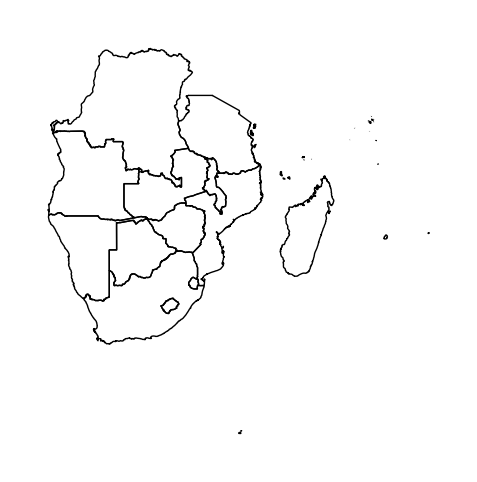

In [90]:
gplt.polyplot(sadcData);

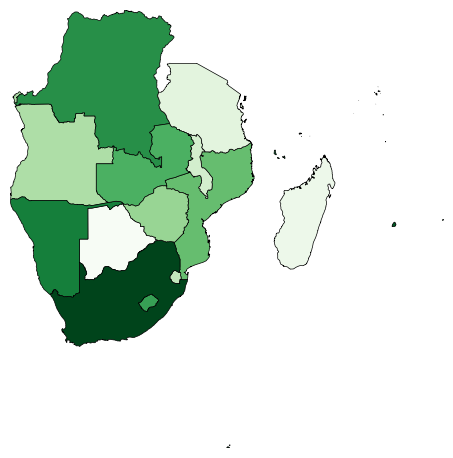

In [96]:
fig, ax = plt.subplots(1, 1)

# set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(maps_full['cases_smape_1'], k = 5)

# map
gplt.choropleth(maps_full, 
    hue="cases_smape_1", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Greens',
#     legend=True,
    edgecolor='black',
    extent = maps_full.total_bounds,
    ax=ax
);

# ax.set_title('sMAPE for Individual Countries for total_cases');

plt.tight_layout()
plt.savefig(save_path + 'map_cases_smape_1.pdf', dpi = 600)
plt.show()

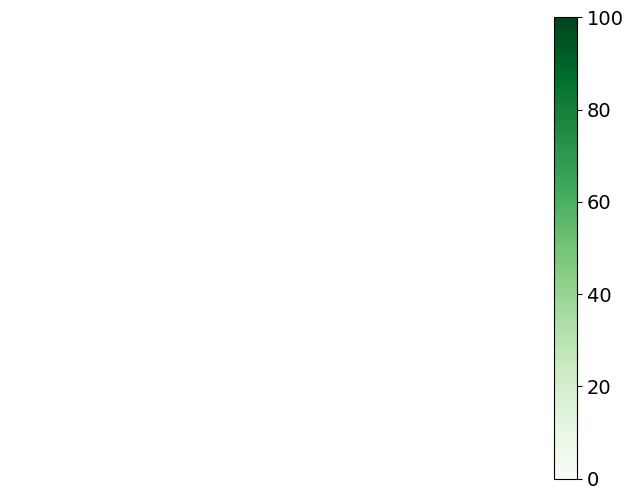

In [92]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# set the range for the choropleth
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, 1)
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)
fig.tight_layout(pad=0)
plt.savefig(save_path + 'map_cases_smape_1_legend.pdf', dpi = 600)

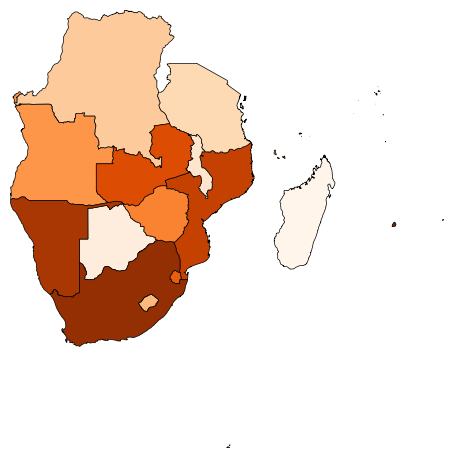

In [93]:
fig, ax = plt.subplots(1, 1)

# set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(maps_full['deaths_smape_1'], k = 5)

# map
gplt.choropleth(maps_full, 
    hue="deaths_smape_1", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Oranges',
#     legend=True,
    edgecolor='black',
    extent = maps_full.total_bounds,
    ax=ax
);

# ax.set_title('sMAPE for Individual Countries for total_cases');

plt.tight_layout()
plt.savefig(save_path + 'map_deaths_smape_1.pdf', dpi = 600)
plt.show()



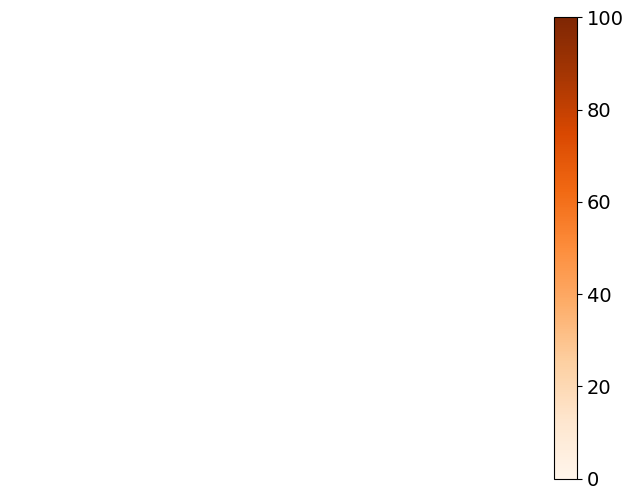

In [94]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# set the range for the choropleth
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, 1)
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)
fig.tight_layout(pad=0)
plt.savefig(save_path + 'map_deaths_smape_1_legend.pdf', dpi = 600)

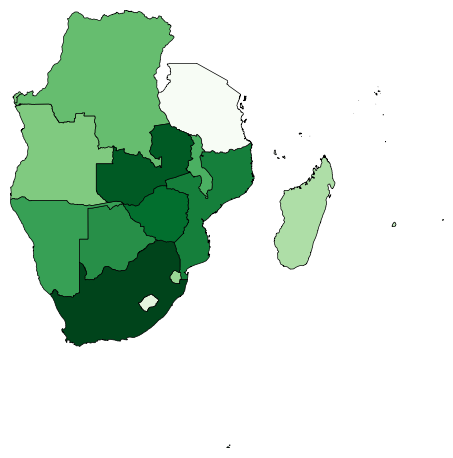

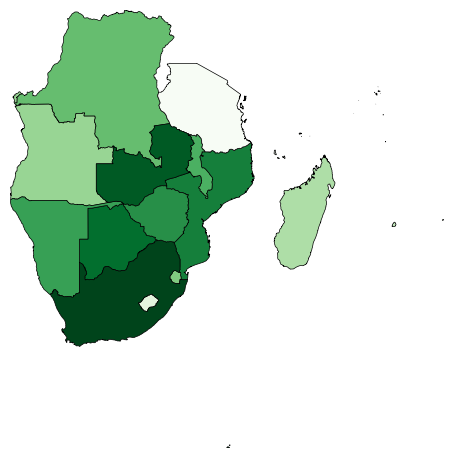

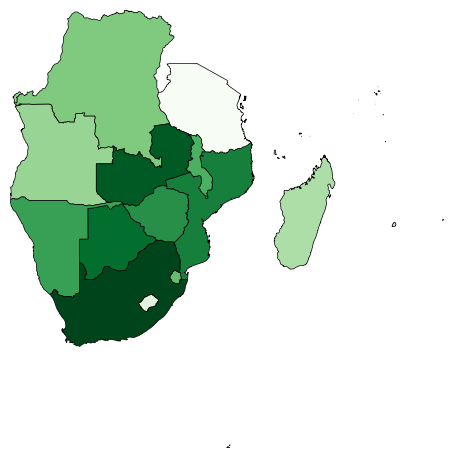

In [97]:
# MIS cases

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['cases_mis_01'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_mis_01", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Greens',
#     legend=True,
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_01.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['cases_mis_05'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_mis_05", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Greens',
#     legend=True,
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['cases_mis_1'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_mis_1", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Greens',
#     legend=True,
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_1.pdf', dpi = 600)
plt.show()

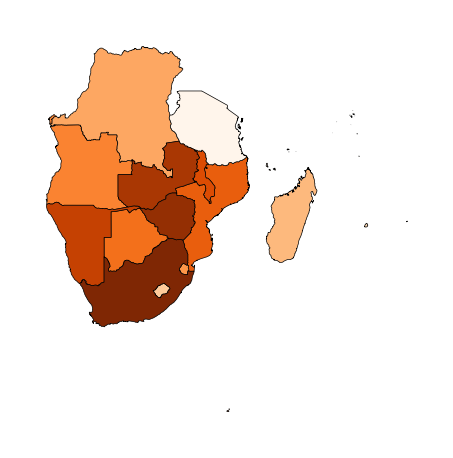

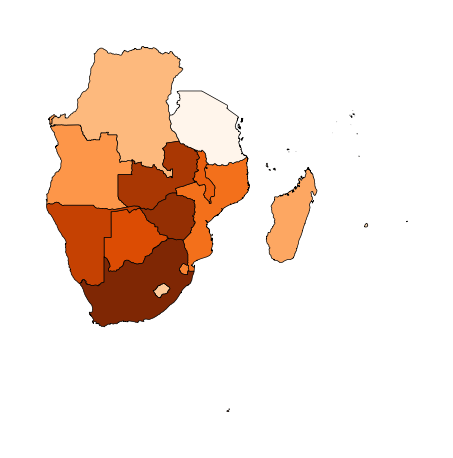

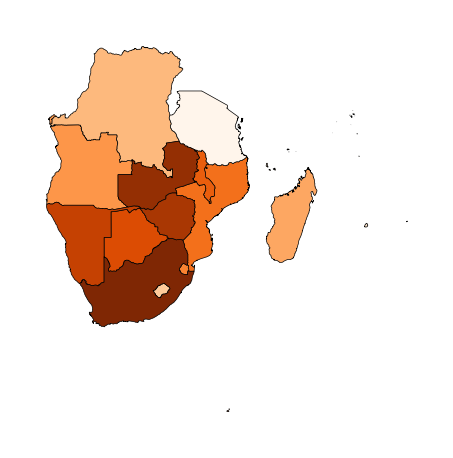

In [98]:
# MIS deaths

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['deaths_mis_01'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_mis_01", 
    linewidth=.5,
#     scheme=scheme
    cmap='Oranges',
#     legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_01.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['deaths_mis_05'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_mis_05", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Oranges',
#     legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['deaths_mis_1'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_mis_1", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Oranges',
#     legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_1.pdf', dpi = 600)
plt.show()

In [43]:
# # COV deaths

# fig, ax = plt.subplots(1, 1)
# # set up the color sheme:
# import mapclassify as mc
# # scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['deaths_cov_01'], k = 5)
# # map
# gplt.choropleth(maps_full, 
#     hue="deaths_cov_01", 
#     linewidth=.5,
#     scheme=scheme, cmap='hot',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );
# # ax.set_title('MIS for Each Country for total_cases')
# plt.tight_layout()
# plt.savefig(save_path + 'map_deaths_cov_01.pdf', dpi = 600)
# plt.show()

# fig, ax = plt.subplots(1, 1)
# # set up the color sheme:
# import mapclassify as mc
# # scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['deaths_cov_05'], k = 5)
# # map
# gplt.choropleth(maps_full, 
#     hue="deaths_cov_05", 
#     linewidth=.5,
#     scheme=scheme, cmap='hot',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );
# # ax.set_title('MIS for Each Country for total_cases')
# plt.tight_layout()
# plt.savefig(save_path + 'map_deaths_cov_05.pdf', dpi = 600)
# plt.show()

# fig, ax = plt.subplots(1, 1)
# # set up the color sheme:
# import mapclassify as mc
# # scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['deaths_cov_1'], k = 5)
# # map
# gplt.choropleth(maps_full, 
#     hue="deaths_cov_1", 
#     linewidth=.5,
#     scheme=scheme, cmap='hot',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );
# # ax.set_title('MIS for Each Country for total_cases')
# plt.tight_layout()
# plt.savefig(save_path + 'map_deaths_cov_1.pdf', dpi = 600)
# plt.show()

In [44]:
# # COV cases

# fig, ax = plt.subplots(1, 1)
# # set up the color sheme:
# import mapclassify as mc
# # scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['cases_cov_01'], k = 5)
# # map
# gplt.choropleth(maps_full, 
#     hue="cases_cov_01", 
#     linewidth=.5,
#     scheme=scheme, cmap='hot',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );
# # ax.set_title('MIS for Each Country for total_cases')
# plt.tight_layout()
# plt.savefig(save_path + 'map_cases_cov_01.pdf', dpi = 600)
# plt.show()

# fig, ax = plt.subplots(1, 1)
# # set up the color sheme:
# import mapclassify as mc
# # scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['cases_cov_05'], k = 5)
# # map
# gplt.choropleth(maps_full, 
#     hue="cases_cov_05", 
#     linewidth=.5,
#     scheme=scheme, cmap='hot',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );
# # ax.set_title('MIS for Each Country for total_cases')
# plt.tight_layout()
# plt.savefig(save_path + 'map_cases_cov_05.pdf', dpi = 600)
# plt.show()

# fig, ax = plt.subplots(1, 1)
# # set up the color sheme:
# import mapclassify as mc
# # scheme = mc.Quantiles(range(0, 101), k = 5)
# scheme = mc.Quantiles(maps_full['cases_cov_1'], k = 5)
# # map
# gplt.choropleth(maps_full, 
#     hue="cases_cov_1", 
#     linewidth=.5,
#     scheme=scheme, cmap='hot',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );
# # ax.set_title('MIS for Each Country for total_cases')
# plt.tight_layout()
# plt.savefig(save_path + 'map_cases_cov_1.pdf', dpi = 600)
# plt.show()